# 1. REGRESSION

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## 1) Simple Linear Reg

In [70]:
### Download data with wget command
#!conda install -c conda-forge wget --yes
#!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

In [71]:
df = pd.read_csv("FuelConsumption.csv")
df.head(2)
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Explore and plot

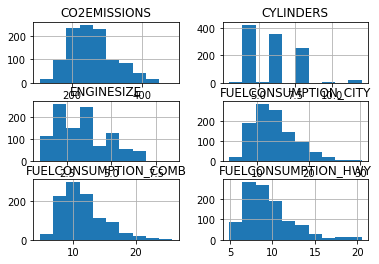

In [72]:
# select a few features and plot histograms

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(2)
cdf.hist()
plt.show()

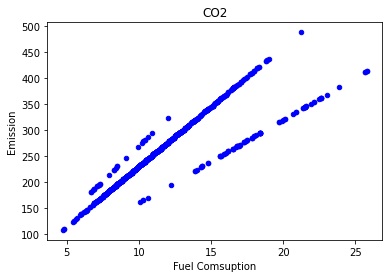

In [73]:
# scatter feature 1

cdf.plot(kind='scatter', x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS',color='blue')
# plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS) # another way
plt.xlabel('Fuel Comsuption')
plt.ylabel('Emission')
plt.title('CO2')
plt.show()

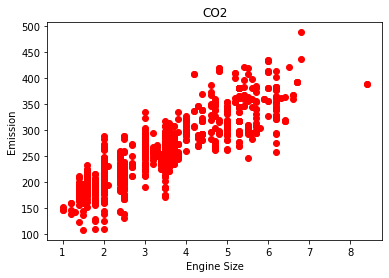

In [74]:
# scatter feature 2
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('CO2')
plt.show()

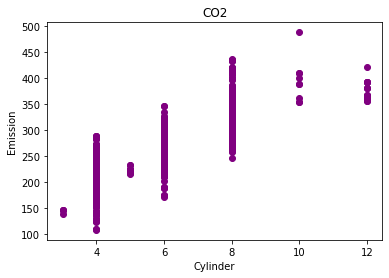

In [75]:
# scatter feature 3
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'purple')
plt.xlabel('Cylinder')
plt.ylabel('Emission')
plt.title('CO2')
plt.show()

### Build train and test dataset

In [76]:
msk = np.random.rand(len(df)) < 0.8  # create a mask to select random row
train = cdf[msk]  # 80% of data
test = cdf[~msk]  # ~mak

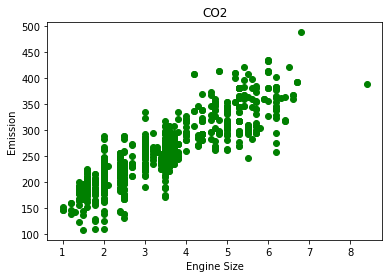

In [77]:
# see training dataset
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('CO2')
plt.show()

### Modeling

In [78]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])  # equal to train['col'].values
train_y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x, train_y)
print('Coefficient is:', reg.coef_)
print('Intercept is:', reg.intercept_)

Coefficient is: [[39.24078475]]
Intercept is: [124.54153574]


### Plot regression

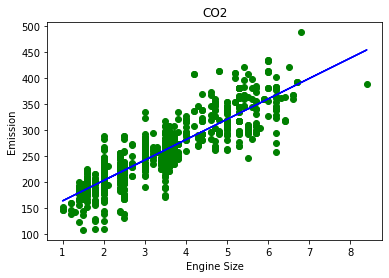

In [79]:
plt.plot(train_x, train_x * reg.coef_[0][0]+reg.intercept_[0], 'b-')

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('CO2')
plt.show()

### Evaluation

In [80]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_yhat = reg.predict(test_x)

ME = np.mean(np.absolute(test_yhat - test_y))
MSE = np.mean((test_yhat- test_y)**2) 
R2 = r2_score(test_yhat, test_y)

print("Mean absolute error: ", ME)
print('Residual sum of squares (MSE):', MSE)
print('R2:', R2)


Mean absolute error:  22.50499673883449
Residual sum of squares (MSE): 916.3966912930529
R2: 0.7010581085652867


## 2) Multiple Linear Reg

### Train with multiple Xs

In [81]:
train_xmul = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
reg.fit(train_xmul,train_y)
print('coefficients are: ', reg.coef_)
print('Intercept is: ', reg.intercept_)

coefficients are:  [[10.53310967  7.53470899  9.71984482]]
Intercept is:  [64.4905962]


### Prediction & Evalution

In [87]:
test_xmul = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_yhatmul = reg.predict(test_xmul)

MSE_mul = np.mean((test_yhatmul - test_y)**2)
var = reg.score(test_xmul, test_y)  # 𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−𝑉𝑎𝑟{𝑦−𝑦̂ }/𝑉𝑎𝑟{𝑦} 
                                    # The best possible score is 1.0, lower values are worse

print("Residual sum of squares (MSE): ", MSE_mul)
print("Variance score: ", var)




Residual sum of squares (MSE):  573.0221985412178
Variance score:  0.852347440940269


NameError: name 'dim' is not defined

***Use __FUEL CONSUMPTION in CITY__ and __FUEL CONSUMPTION in HWY__***

In [93]:
regq = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regq.fit(x,y)
print('Coefficients are: ', regq.coef_)

yhat = regq.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])

print("MSE: %.2f" % np.mean((yhat - test[['CO2EMISSIONS']])**2))

x = test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']].values
y = test[['CO2EMISSIONS']].values

print("variance score: %.2f" % regq.score(x,y))

Coefficients are:  [[10.58487471  7.22515438  6.1316697   3.33765573]]
MSE: 574.79
variance score: 0.85


## 3) Polynomial Reg

### Import

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Goal is:  1)fit_transform x and output a list higher degree values
#           2)fit linear reg to higher degrees

### Polyfit

In [18]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_xpoly = poly.fit_transform(train_x)  # first increase degree

train_xpoly

array([[ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [19]:
clf = linear_model.LinearRegression()
clf.fit(train_xpoly, train_y)

print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)


Coefficients:  [[ 0.         47.89210575 -1.06399864]]
Intercept:  [110.68320014]


### Plot

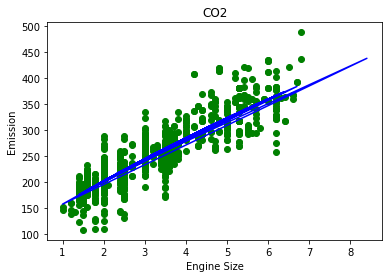

In [20]:
plt.plot(test_x, clf.intercept_[0] + clf.coef_[0][1]*test_x + clf.coef_[0][2]*test_x**2, 'b-')

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='green')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('CO2')
plt.show()

### Evaluation 

In [21]:
from sklearn.metrics import r2_score

test_xpoly = poly.fit_transform(test_x)

test_yhat = clf.predict(test_xpoly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_yhat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_yhat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_yhat , test_y) )

Mean absolute error: 23.84
Residual sum of squares (MSE): 923.83
R2-score: 0.72


***Try degree = 3***

Coefficients are:  [[ 0.         31.97036669  3.57317477 -0.40764572]]
Intercept is:  [126.82426216]
MSE: 903.2213961325986
R2: 0.722402320338009


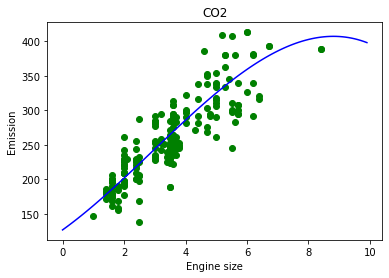

In [22]:
# initialize poly and linear
poly3 = PolynomialFeatures(degree=3)
reg3 = linear_model.LinearRegression()

# prepare poly transform
train_x3 = poly3.fit_transform(train_x)

# fit linear with poly
reg3.fit(train_x3, train_y)
print('Coefficients are: ', reg3.coef_)
print('Intercept is: ', reg3.intercept_)

# predict (poly+predict with test)
test_x3 = poly3.fit_transform(test_x)
test_yhat3 = reg3.predict(test_x3)

# out-of-sample evaluation
mse_poly3 = np.mean((test_yhat3-test_y)**2)
r2_poly3 = r2_score(test_yhat3, test_y)

print('MSE:', mse_poly3)
print('R2:', r2_poly3)

# plot
plt.scatter(test_x, test_y, color='green')

xplot = np.arange(0.0,10.0,0.1)
yplot = reg3.intercept_[0]+reg3.coef_[0][1]*xplot+reg3.coef_[0][2]*xplot**2+reg3.coef_[0][3]*xplot**3
plt.plot(xplot,yplot,'b-')

plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.title('CO2')
plt.show()


## 4) Non-Linear Reg

### Random fitting

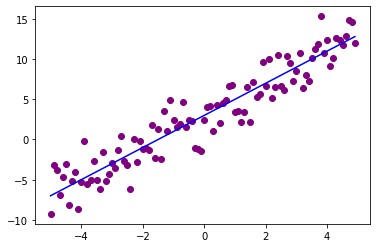

In [23]:
# try a linear one
x = np.arange(-5,5,0.1) # learn x.size = No. of datapoints

y = 2*x+3

y_noise = 2*np.random.normal(size = x.size) #  np.random.normal(size=No.of datapoints)
y_data = y + y_noise

plt.scatter(x,y_data, color = 'purple')
plt.plot(x,y,'b-')
plt.show()

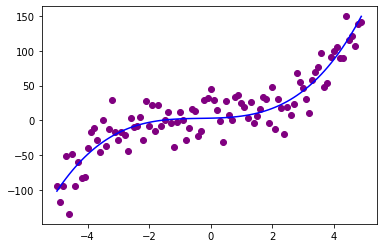

In [24]:
# try a polynomial one

y = 1*np.power(x,3) + 1* np.power(x,2) + 1*x +3

y_noise = 20*np.random.normal(size = x.size)
y_data=y+y_noise

plt.scatter(x,y_data, color = 'purple')
plt.plot(x,y,'b-')
plt.show()

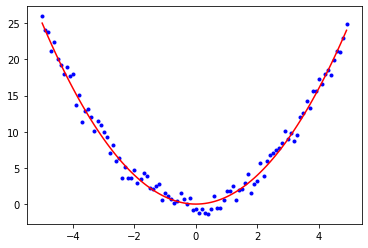

In [25]:
# try a Quadradic one

y = np.power(x,2)

y_noise = np.random.normal(size = x.size)
y_data = y + y_noise

plt.plot(x, y_data,'b.')
plt.plot(x, y ,'r-')
plt.show()


### Non-linear functions

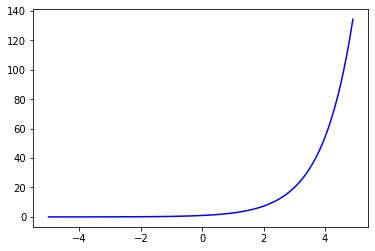

In [26]:
# Exponetial

y = np.exp(x)

plt.plot(x,y,'b-')

<ipython-input-27-0b455d331154>:3: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


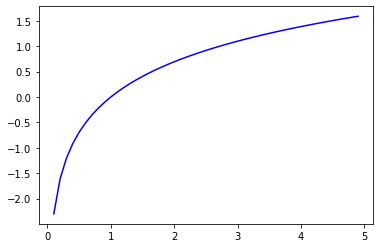

In [27]:
# Logarithmic

y = np.log(x)

plt.plot(x,y,'b-')

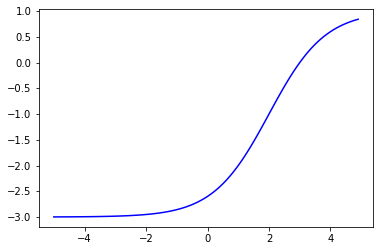

In [28]:
# Sigmoidal/Logistic

y =  1 - 4/(1+np.power(3, x-2))

plt.plot(x,y,'b-')

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

### Example dataset

In [29]:
# import dataset and visualize
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

df = pd.read_csv('china_gdp.csv')
df.head(3)

2020-08-18 09:29:37 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10


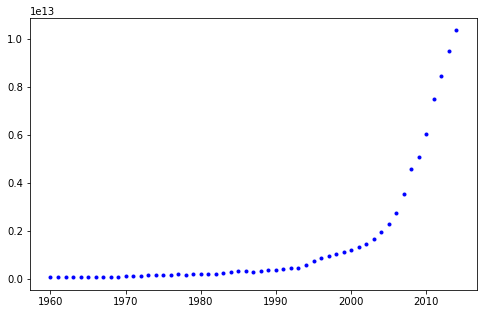

In [30]:
plt.figure(figsize=(8,5))

x_data, y_data = df['Year'].values, df['Value'].values # eqivalent to np.asanyarray
plt.plot(x_data,y_data,'b.')

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [31]:
# Built this sigmod model

def sigmoid(x,beta1,beta2):
    y = 1 / (1+np.exp(-beta1*(x-beta2)))
    return y

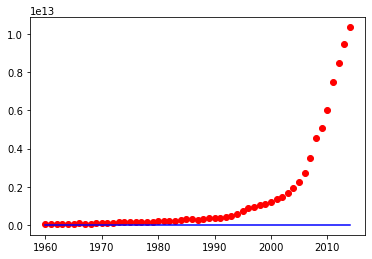

In [32]:
# Choose a parameter to look

beta_1 = 0.1
beta_2 = 1990

y_pred = sigmoid(x_data, beta_1,beta_2)
plt.plot(x_data,y_pred,'b-')
plt.scatter(x_data,y_data, color ='red')

In [33]:
# normalize the parameters

x_norm = x_data / max(x_data)
y_norm = y_data / max(y_data)

In [34]:
# use curve_fit and popt to optimized parameters

from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x_norm, y_norm)

print('beta1 = %f, beta2 = %f' % (popt[0],popt[1]))



beta1 = 690.453018, beta2 = 0.997207


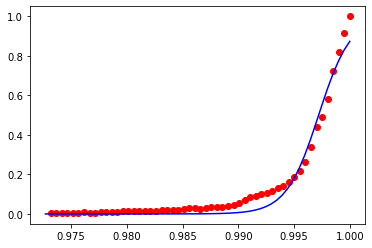

In [35]:
# finally plot model and data

xplot = np.linspace(1960, 2015, 55)  # opposite of np.arange()
xplot_norm = xplot/max(xplot)

yplot_hat = sigmoid(xplot_norm, *popt) # notice the use of '*popt'

plt.scatter(x_norm, y_norm, color = 'red')
plt.plot(xplot_norm, yplot_hat, 'b-')


In [36]:
# Accuracy (use train and test dataset)
msk = np.random.rand(len(df)) < 0.8

train_x,train_y = x_norm[msk],y_norm[msk]
test_x,test_y = x_norm[~msk],y_norm[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

print('beta1 is %f and beta2 is %f' % (popt[0],popt[1]))


test_yhat = sigmoid(test_x, *popt)

mse = np.mean((test_yhat - test_y)**2)
print('MSE is: ', mse)

from sklearn.metrics import r2_score

r2 = r2_score(test_yhat, test_y)
print('R2 is: ', r2)


beta1 is 82.261048 and beta2 is 1.369374
MSE is:  0.09905365261319726
R2 is:  -3.702033558446907e+26


/Users/yan/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


# 2. CLASSIFICATION

In [37]:
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

from sklearn import preprocessing
%matplotlib inline

## 1) KNN

### Get data

In [38]:
# get data
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

df = pd.read_csv('teleCust1000t.csv')
df.head(2)

--2020-08-18 09:29:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.03s   

2020-08-18 09:29:39 (1.13 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4


Goal: predict 'custcat' for new customers. Group as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

In [39]:
df['custcat'].value_counts() # how many in each class

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

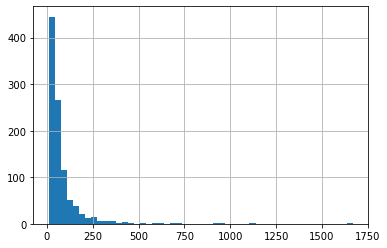

In [40]:
df['income'].hist(bins=50) # or df.hist(column='income', bins=50)

### Preprocess (select and normalize)

In [41]:
# Get array and normalize
df.columns

x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

y = df['custcat'].values

x = preprocessing.StandardScaler().fit(x).transform(x.astype(float)) # normalize to N(0,1)


### Train and test data

In [42]:
# Split train and test using sklearn

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

print('Train set shape: ', x_train.shape, y_train.shape)

Train set shape:  (800, 11) (800,)


### Apply KNN classifier and train

In [43]:
from sklearn.neighbors import KNeighborsClassifier
k=4 # Train with k=4

neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predict and evaluation: 
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [44]:
# Predict and accuracy
yhat = neigh.predict(x_test)  # predict yhat

from sklearn import metrics

in_sample_accu = metrics.accuracy_score(y_train, neigh.predict(x_train)) # use metrics to the accuracy
out_sample_accu = metrics.accuracy_score(y_test, yhat)

print("Train set Accuracy: ", in_sample_accu)
print("Test set Accuracy: ", out_sample_accu)

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


***How is k=6***

In [45]:
# initialize the model 
k=6
neigh6 = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)

yhat6 = neigh6.predict(x_test)

accu6 = metrics.accuracy_score(y_test, yhat6)

print('Test set accuracy with k=6: ', accu6)



Test set accuracy with k=6:  0.31


### Choose different k

In [46]:
# set up possible parameters
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = []

# start looping: notice Ks range and loop range (0 or 1)
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test / np.sqrt(yhat.shape[0]))
    
mean_acc
std_acc

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

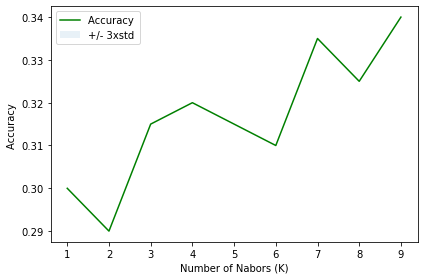

The best accuracy was with 0.34 with k= 9


In [47]:
# Plot for different k

plt.plot(range(1,Ks),mean_acc,'g')  # range(1,Ks) as x-axis
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
            # plt regression std fill_between with mean and std


plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

## 2) Decision Trees

### Gett data

In [48]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

df = pd.read_csv('drug200.csv', delimiter=',')
df.head(5)
df.shape

--2020-08-18 09:29:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-08-18 09:29:41 (250 MB/s) - ‘drug200.csv’ saved [6027/6027]



(200, 6)

### Preprocess:  
some features in this dataset are categorical such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. __pandas.get_dummies()__Convert categorical variable into dummy/indicator variables.

In [49]:
df.columns

y = df['Drug'].values

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

lb_sex = preprocessing.LabelEncoder() # initialize an encoder
lb_sex.fit(['F','M'])                 # fit the encoder with labels
X[:,1] = lb_sex.transform(X[:,1])     # use the fitted encoder to transform category to number

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

### Train and test data

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)
print('Train set shape: ', x_train.shape, y_train.shape)
print('Test set shape: ', x_test.shape, y_test.shape)

Train set shape:  (140, 5) (140,)
Test set shape:  (60, 5) (60,)


### Modeling with decision tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

drugTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
drugTree

drugTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Predict and evaluate

In [52]:
yhat = drugTree.predict(x_test)

out_sample_accu = metrics.accuracy_score(yhat, y_test) # computes labels predicted match y_true.  
print('Test accuracy: ', out_sample_accu)

sum(yhat == y_test)/y_test.shape[0]


Test accuracy:  0.9833333333333333


0.9833333333333333

### Plot

In [53]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()

out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

ModuleNotFoundError: No module named 'sklearn.externals.six'

## 3) Logistic Reg.

In [ ]:
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 

### Data selection and preprocess

In [ ]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
df = pd.read_csv('ChurnData.csv')
df.head(2)

df.columns
X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].values
y = df['churn'].astype('int').values  # convert column type

y[0:5]

# Normalize

X = preprocessing.StandardScaler().fit(X).transform(X)


### Train and test dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=4)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

### Modeling & Predict

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logis = LogisticRegression(C=0.01, solver = 'liblinear').fit(x_train, y_train)
                # solver: ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ 
                # C: pos float = inverse of regularization strength
                #    smaller C, stronger regularization

yhat = logis.predict(x_test)

yhat_prop = logis.predict_proba(x_test)
                # predict_proba: prop ordered by the label of classes. 
                # 1st col = P(Y=1|X), 2nd col = P(Y=0|X)


### Evaluation

In [ ]:
# Jaccard index
from sklearn.metrics import jaccard_score

jaccard_score(y_test, yhat)


In [138]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools


cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


ValueError: At least one label specified must be in y_true

In [132]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [137]:
# Plot non-normalized confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    


In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
# Logloss
from sklearn.metrics import log_loss

log_loss(y_test, yhat_prop)

## 4) SVM

In [94]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [107]:
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
    
df = pd.read_csv('cell_samples.csv')
df.head(2)

--2020-08-18 10:02:46--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  20.19K  --.-KB/s    in 0.02s   

2020-08-18 10:02:46 (851 KB/s) - ‘cell_samples.csv’ saved [20675/20675]



,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


Data explain:

The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

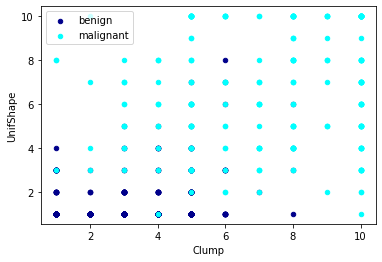

In [108]:
ax = df[df['Class'] == 2].plot(kind = 'scatter', x='Clump', y='UnifShape', color = 'Darkblue', label = 'benign')
df[df['Class'] == 4].plot(kind = 'scatter', x='Clump', y='UnifShape', color = 'cyan', label = 'malignant', ax=ax)
plt.show()

### Preprocess

In [109]:
df.dtypes # Drop or change 'object' columns

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [117]:
cell_df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()] # change type
                # object to int : argument cannot do 'astype', must 'to_numeric' first
                # select .notnull() rows
                # last specify 'astype' int or float

cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes
cell_df.head(2)

<ipython-input-117-2bb226985fe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [118]:
# select the columns we want
x = cell_df[['Clump','UnifSize','UnifShape','MargAdh',
                      'SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']].values
y = cell_df[['Class']].values

### Train and test split

In [119]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 4)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(546, 9) (546, 1) (137, 9) (137, 1)


### Modeling with SVM

In [123]:
from sklearn import svm

mdl = svm.SVC(kernel = 'rbf')

mdl.fit(x_train, y_train)

yhat = mdl.predict(x_test)
yhat[0:5]

/Users/yan/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([2, 4, 2, 4, 2])

### Evaluation

In [128]:
# F1 score

from sklearn.metrics import f1_score

f1_score(y_test, yhat, average='weighted')


0.9639038982104676

In [154]:
# Jaccard Index for accuracy
from sklearn.metrics import jaccard_score

jaccard_score(yhat_ln, y_test, labels=[2,4], pos_label=4) # Here since label is not 0 or 1
                                                          # Must spicify labels and pos_label aka new '1'

0.9038461538461539

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


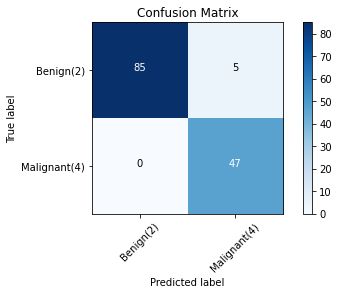

In [140]:
# Confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools

cnf_mat = confusion_matrix(y_test, yhat, labels=[2,4])  # always need specify labels [0,1] or [2,4] etc

np.set_printoptions(precision=2)
print(classification_report(y_test, yhat))

####### Here again adopt the confusion plot function defined below #######

plt.figure()
plot_confusion_matrix(cnf_mat, classes=['Benign(2)','Malignant(4)'], normalize = False, title='Confusion Matrix')


In [139]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

***Try the same thing with different kernal (e.g.,'linear')***

In [159]:
mpl_ln = svm.SVC(kernel='linear')

mpl_ln.fit(x_train, y_train)

yhat_ln = mpl_ln.predict(x_test)

print('F1 average score is: %0.2f' % f1_score(yhat_ln, y_test, average='weighted'))
print('Jaccard index is: %0.2f' % jaccard_score(yhat_ln, y_test, labels=[2,4], pos_label=4))



F1 average score is: 0.96
Jaccard index is: 0.90


/Users/yan/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# 3. CLUSTERING

## 1) K-Means

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### Set up a random seed for random initialization

In [22]:
np.random.seed(0)

### Get data or get random clusterable points by make_blobs

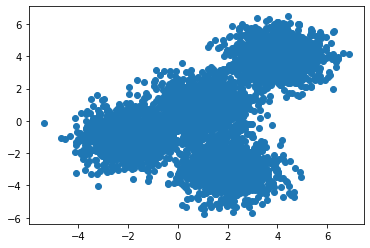

In [24]:
x,y = make_blobs(n_samples=5000, centers = [[4,4],[-2,-1],[2,-3],[1,1]], cluster_std = 0.9)
    # set number of pts, actual centers, dispersion
    # x - 2D array points; y - actual label

plt.scatter(x[:,0],x[:,1])

### Modeling and fitting

In [25]:
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init=12)
        # init, k, number of run with different centroids

k_means.fit(x)  # unsupervised so no y only x

KMeans(n_clusters=4, n_init=12)

### Outputs

In [26]:
k_means_labels = k_means.labels_   # model.labels_ : output labels of all pts
k_means_centers = k_means.cluster_centers_  # model.cluster_centers_

print(k_means_labels,k_means_centers)

[0 2 2 ... 1 0 0] [[-2.03375169 -0.99827293]
 [ 3.97334234  3.98758687]
 [ 1.99876902 -3.01796355]
 [ 0.96959198  0.98543802]]


### Visualization

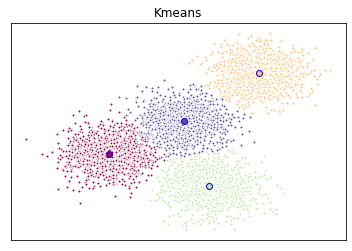

In [44]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels)))) # set(labels) quick see how many category
                # choose consistent color: plt.cm.Spectral(array)

# put in a loop to plot each group
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors): # two variable loop together
    members = (k_means_labels == k)    # T/F used as index of members 
    centers = (k_means_centers[k])
                         
    ax.plot(x[members,0], x[members,1],'w',markerfacecolor = col, marker='.') # member = index  # w is dots                       
    ax.plot(centers[0], centers[1], 'o', markerfacecolor = col, markeredgecolor='b', markersize=6) 
                                                            # edge color to show the centroids  # o shows circle
                         
ax.set_title('Kmeans')

ax.set_xticks(()) # Remove axis ticks
ax.set_yticks(())

# Show the plot
plt.show()                         
               

***How about 3 clusters***

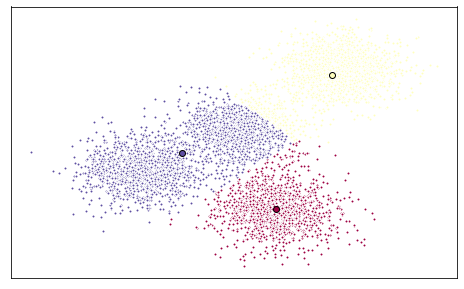

In [57]:
# fit the model
k_means3 = KMeans(init='k-means++', n_clusters = 3, n_init = 20)
k_means3.fit(x)

# labels and centers
label3 = k_means3.labels_
center3 = k_means3.cluster_centers_

# initialize the plot
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
color3 = plt.cm.Spectral(np.linspace(0,1, len(center3)))

# loop and plot
for k, col in zip(range(len(center3)), color3):
    member = (label3 == k)
    center = center3[k]
    
    ax.plot(x[member,0], x[member,1], 'w', markerfacecolor = col, marker='.')
    ax.plot(center[0], center[1], 'o',markerfacecolor = col, markeredgecolor ='black', markersize=6)
    
    
ax.set_xticks(())
ax.set_yticks(())
plt.show()    
    

### Try with real data not rand_pts

In [20]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
    
df = pd.read_csv('Cust_Segmentation.csv')
df.dtypes

--2020-08-19 13:44:33--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.03s   

2020-08-19 13:44:33 (1.06 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

### Preprocess without object-types and normalize

In [21]:
df = df.drop('Address', axis=1)

df.head(2)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8


In [59]:
from sklearn.preprocessing import StandardScaler

dat = df.values[:,1:]  # drop dataframe style and get a numeric array
                       # exclue 1st column of id
dat = np.nan_to_num(dat) # fix nan values

clus_dataset = StandardScaler().fit_transform(dat) # normalize non-nan array
clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [62]:
clusterNo = 3

k_means = KMeans(init = 'k-means++', n_clusters = clusterNo, n_init = 12)
k_means.fit(clus_dataset)

labels = k_means.labels_
df['Clus_km'] = labels   # add labels to orignial dataframe

### What to do with the labels (calculations)

In [63]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


### Visualize again

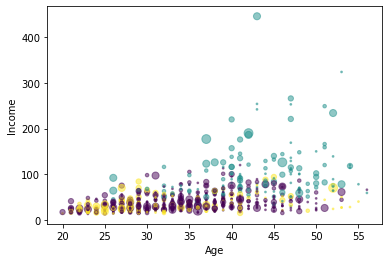

In [67]:
# Bubble plot

area = np.pi*(dat[:,1])**2     # a circle of edu
plt.scatter(dat[:,0], dat[:,3], s=area, c=labels.astype(np.float), alpha = 0.5) 
                               # age and income, size = edu

plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

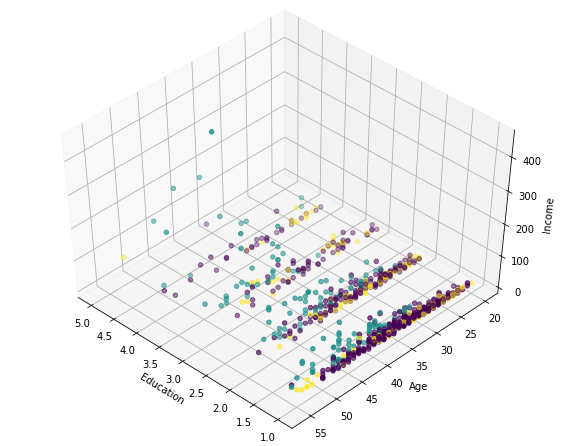

In [82]:
# Actual 3D plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax= Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(dat[:, 1], dat[:, 0], dat[:, 3], c= labels.astype(np.float))


## 2) Agglomerative Clustering

In [83]:
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

from sklearn.datasets import make_blobs

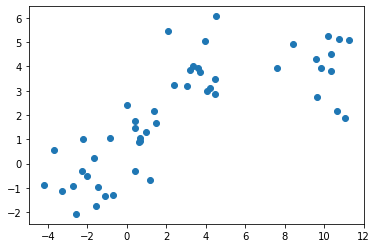

In [86]:
np.random.seed(2)
x, y = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

plt.scatter(x[:,0],x[:,1], marker='o')

### Model with agglomerative

In [87]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')

agglom.fit(x, y)  # fit with both x and y label, since you label all pts at first

AgglomerativeClustering(linkage='average', n_clusters=4)

### Visualization

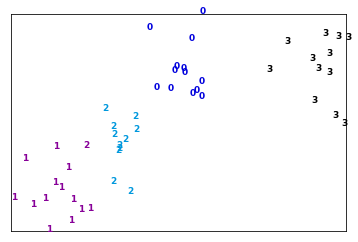

In [89]:
plt.figure(figsize=(6,4))
x_min, x_max = np.min(x, axis=0), np.max(x, axis=0)

x = (x-x_min)/(x_max - x_min)

for i in range(x.shape[0]):
    plt.text(x[i,0],x[i,1], str(y[i]), 
            color = plt.cm.nipy_spectral(agglom.labels_[i]/10.),
            fontdict={'weight':'bold','size':9})
    
plt.xticks(())
plt.yticks(()) # plt.axis('off')
plt.show()

### Dendrogram

In [91]:
dist_matrix = distance_matrix(x, x)
print(dist_matrix)

[[0.         0.26292743 0.96755772 ... 0.17791206 0.37361114 0.31792908]
 [0.26292743 0.         0.71094342 ... 0.38121076 0.11069339 0.05535618]
 [0.96755772 0.71094342 0.         ... 1.08873143 0.60506957 0.65988525]
 ...
 [0.17791206 0.38121076 1.08873143 ... 0.         0.48371315 0.42944363]
 [0.37361114 0.11069339 0.60506957 ... 0.48371315 0.         0.05598816]
 [0.31792908 0.05535618 0.65988525 ... 0.42944363 0.05598816 0.        ]]


<ipython-input-93-90bcb3750f27>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


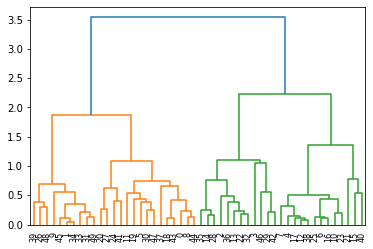

In [93]:
Z = hierarchy.linkage(dist_matrix, 'complete') #'average'...
dendro = hierarchy.dendrogram(Z)

### Try with real data

In [95]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
    
df = pd.read_csv('cars_clus.csv')

print(df.shape)
df.head(2)

--2020-08-19 15:09:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0.04s   

2020-08-19 15:09:42 (424 KB/s) - ‘cars_clus.csv’ saved [17774/17774]

(159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0


### Preprocess with normalization by MinMaxScaler

In [105]:
df.dtypes
df.columns

featureset = df[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
                 'mpg']].apply(pd.to_numeric, errors='coerce')

featureset = featureset.dropna()
#pdf = pdf.reset_index(drop=True)
featureset.head(10)

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
5,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0
6,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0
7,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.1
8,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0
9,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8


In [108]:
from sklearn.preprocessing import MinMaxScaler

dat = featureset.values
featdat = MinMaxScaler().fit_transform(dat)

featdat[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.2716763 , 0.30625832,
        0.20233886, 0.13364055, 0.41935484],
       [0.31428571, 0.43037975, 0.3362256 , 0.44508671, 0.5792277 ,
        0.44112048, 0.31797235, 0.32258065],
       [0.31428571, 0.43037975, 0.31019523, 0.46242775, 0.56724368,
        0.42833832, 0.31797235, 0.35483871],
       [0.35714286, 0.39240506, 0.47722343, 0.50867052, 0.62849534,
        0.53168344, 0.35483871, 0.22580645],
       [0.11428571, 0.24050633, 0.21691974, 0.32369942, 0.38082557,
        0.2999728 , 0.28110599, 0.38709677]])

### Cluster with scipy or scikit-learn

In [110]:
########## With Scipy ########


import scipy
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster

leng = featdat.shape[0]
D = scipy.zeros([leng,leng])

for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(featdat[i],featdat[j])

Z = hierarchy.linkage(D, 'complete')

<ipython-input-110-b03bd4d07566>:9: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])
<ipython-input-110-b03bd4d07566>:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [112]:
max_d = 3

clusters = fcluster(Z, max_d, criterion = 'distance')
clusters

array([ 4,  1,  1,  1,  6,  3, 13,  6,  6,  1,  1,  1,  3,  3,  3,  3,  1,
       10,  4,  6,  1,  1,  1,  2,  4,  9,  1,  6,  6,  3,  6,  3,  3,  4,
        6,  6, 11, 10, 12, 10, 13, 13,  3,  4,  1,  6,  1,  4, 13,  3, 13,
       12,  1, 10,  4,  6,  6,  1,  3,  7,  4,  6,  1,  1,  8,  5,  1,  1,
        1,  3,  3, 12,  1,  3, 13, 10,  4,  6,  6,  1,  1,  3,  5,  6,  6,
        1, 13,  3,  3,  6,  1, 13,  2,  4,  4,  6, 13,  3,  4,  6,  1,  3,
        1,  1,  1,  6,  6,  3,  1,  3,  4,  6,  3,  2,  6,  6,  1,  1,  3,
        3,  5,  5,  5,  6,  6,  4,  4,  4,  6,  6,  6,  6,  4,  6,  1,  4,
        4,  3,  4,  6, 12,  4,  4,  6,  4,  4,  4,  6,  6,  6,  6,  1,  1,
        7,  3], dtype=int32)

In [114]:
k = 5

clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

array([2, 1, 1, 1, 2, 1, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1,
       1, 1, 2, 3, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 4, 4, 5, 4, 5, 5, 1, 2,
       1, 2, 1, 2, 5, 1, 5, 5, 1, 4, 2, 2, 2, 1, 1, 3, 2, 2, 1, 1, 3, 2,
       1, 1, 1, 1, 1, 5, 1, 1, 5, 4, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 5, 1,
       1, 2, 1, 5, 1, 2, 2, 2, 5, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3,
       1], dtype=int32)

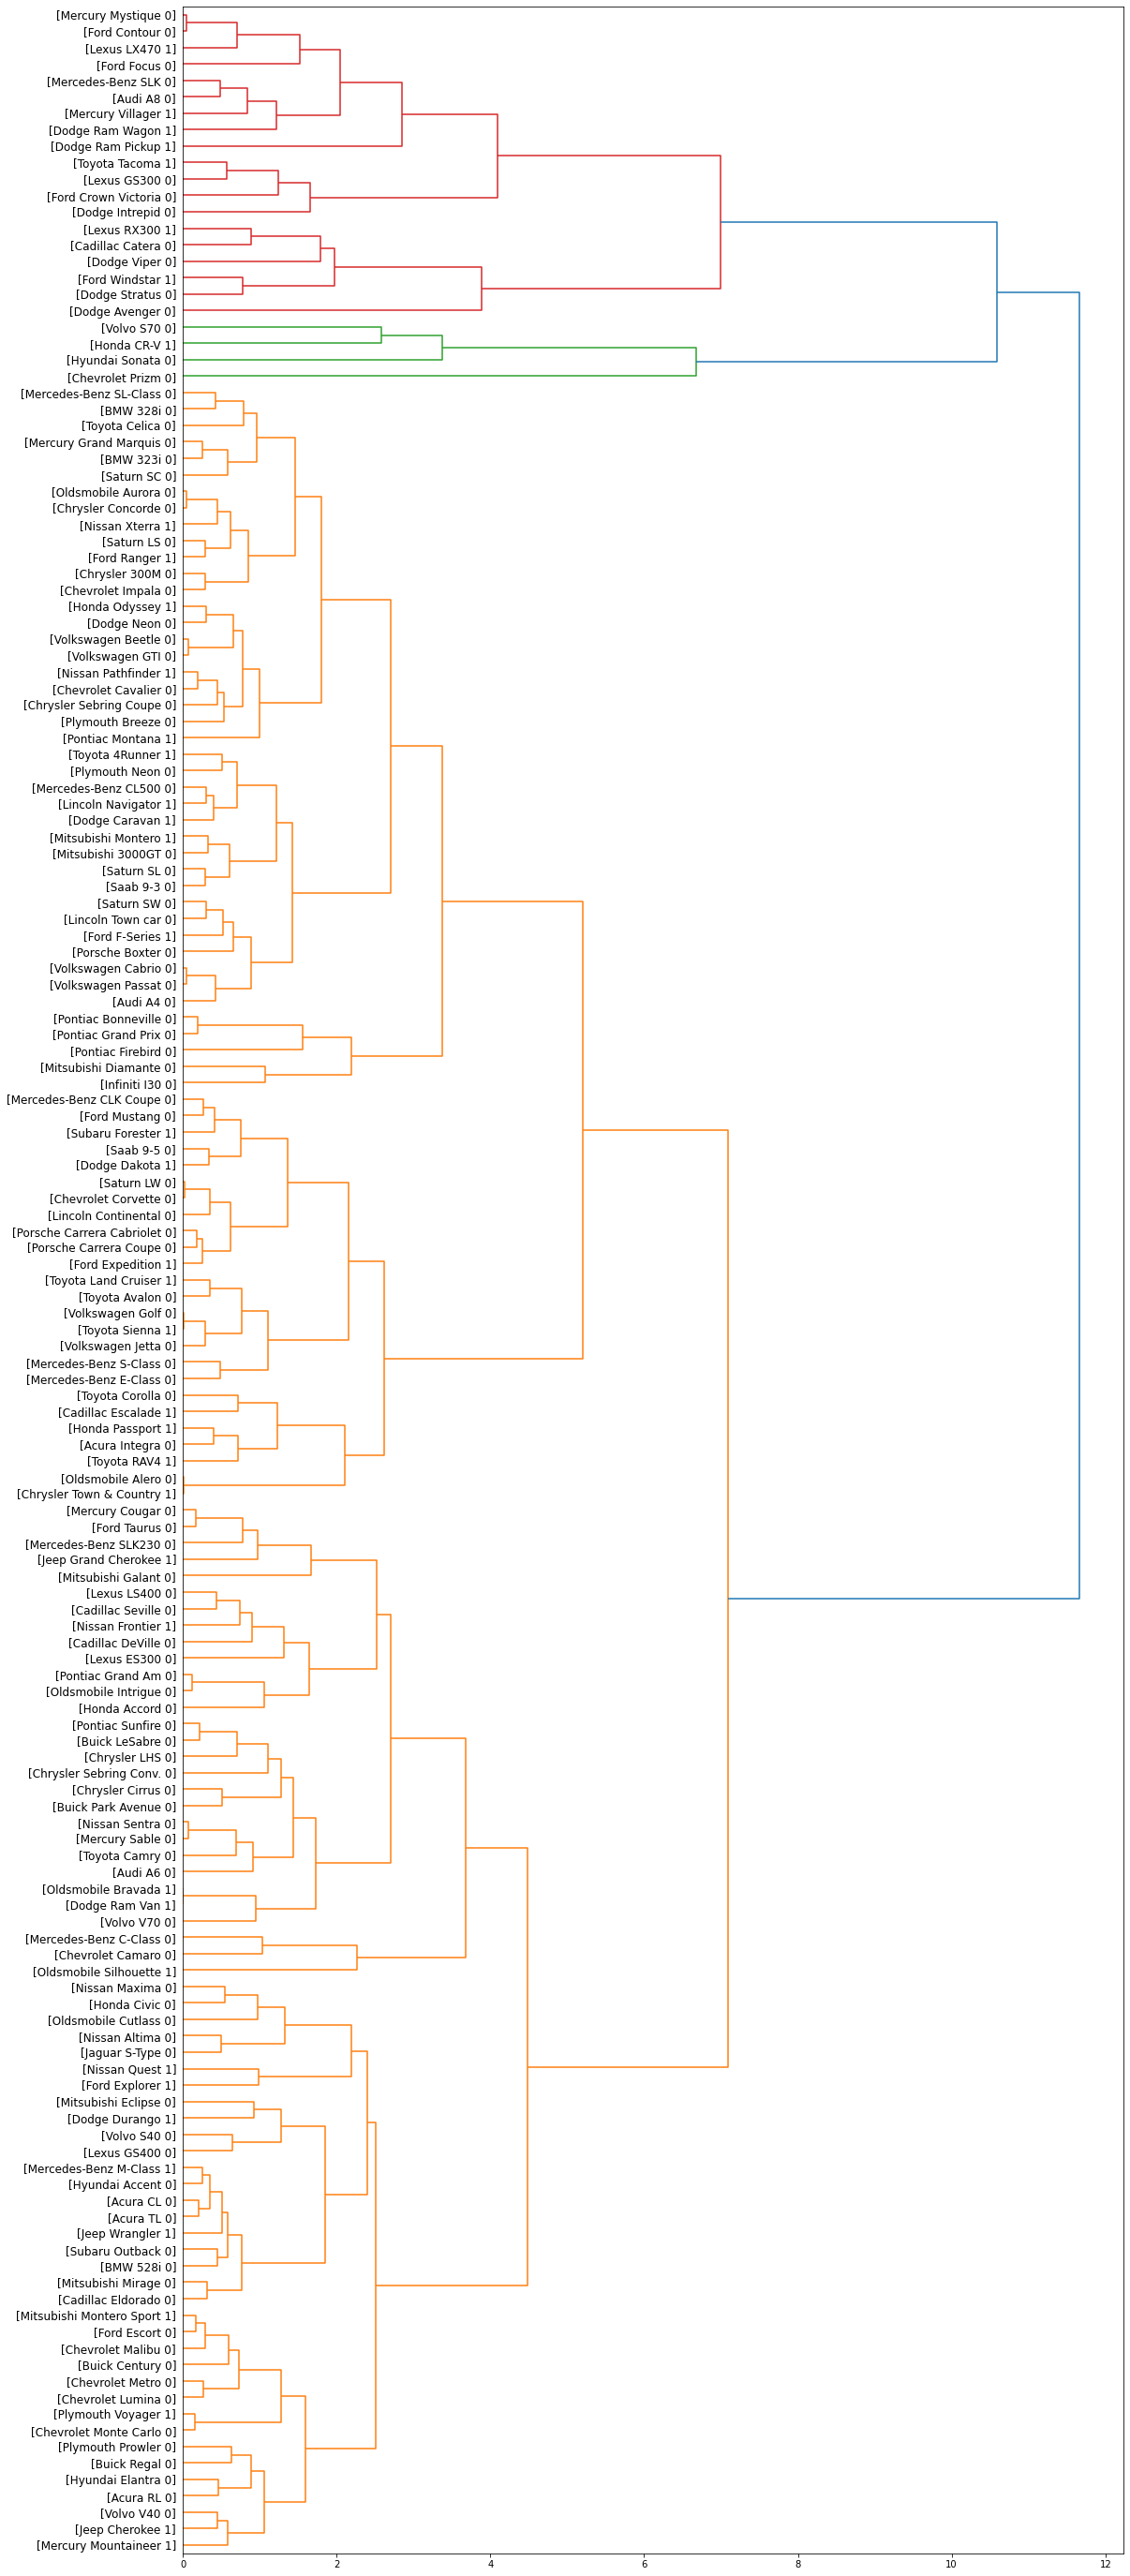

In [116]:
fig = pl.figure(figsize=(18,50))

def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

denfro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')

In [119]:
########## With scikit-learn ########
dist_matrix = distance_matrix(featdat, featdat)
print(dist_matrix)

agg = AgglomerativeClustering(n_clusters=6, linkage='complete')
agg.fit(featdat)
print(agg.labels_)

featureset['cluster'] = agg.labels_


[[0.         0.56004708 0.54342465 ... 0.6575048  0.62435289 0.80552727]
 [0.56004708 0.         0.04822732 ... 0.23115617 0.9070353  0.42690608]
 [0.54342465 0.04822732 0.         ... 0.23633051 0.879962   0.42431572]
 ...
 [0.6575048  0.23115617 0.23633051 ... 0.         0.98000482 0.38034196]
 [0.62435289 0.9070353  0.879962   ... 0.98000482 0.         1.00496569]
 [0.80552727 0.42690608 0.42431572 ... 0.38034196 1.00496569 0.        ]]
[4 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 4 0 0 0 0 3 4 5 0 0 0 0 0 0 0 0 0 0 3
 2 1 1 2 1 0 4 0 0 0 4 1 0 2 1 0 2 4 0 0 0 0 4 4 0 0 0 4 4 0 0 0 0 1 1 0 1
 1 1 4 0 0 0 4 0 0 0 0 0 1 0 0 0 0 1 3 4 4 0 1 0 4 0 0 0 0 0 0 0 0 1 0 2 0
 0 0 0 0 0 0 0 0 2 4 4 4 0 0 4 4 4 0 0 0 0 4 0 0 4 0 0 4 0 1 4 4 0 4 4 4 0
 0 0 0 0 0 5 0]


In [123]:
import matplotlib.cm as cm

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = featureset[featureset.cluster == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


<ipython-input-123-4982083a81d6>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[featureset.cluster == label]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 1152x1008 with 0 Axes>

In [118]:
# Calculation

featureset.groupby(['cluster_','type'])['cluster_'].count()  # 2D group

agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

KeyError: 'cluster_'

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

## 3) DBSCAN Clustering 

__See download file__

# 4. RECOMMENDER

## 1) Content-Based Filtering (movie elements + new user preference)

In [1]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

!wget -O moviedataset.zip https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip
print('unziping ...')
!unzip -o -j moviedataset.zip 

--2020-08-21 09:21:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160301210 (153M) [application/zip]
Saving to: ‘moviedataset.zip’

moviedataset.zip    100%[===================>] 152.88M  1.99MB/s    in 78s     

2020-08-21 09:22:50 (1.96 MB/s) - ‘moviedataset.zip’ saved [160301210/160301210]

unziping ...
Archive:  moviedataset.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: README.txt              
  inflating: tags.csv                


In [4]:
movie_df = pd.read_csv('movies.csv')
rating_df = pd.read_csv('ratings.csv')

movie_df.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


### Preprocessing

In [5]:
# move title to new year column (str.extract, str.replace, strip)

movie_df['year'] = movie_df.title.str.extract('(\(\d\d\d\d\))', expand = False)
                                # find the year in (\(...)), not in the movie name
    
movie_df['year'] = movie_df.year.str.extract('(\d\d\d\d)', expand = False)
                                # remove () around the year
    
movie_df['title'] = movie_df.title.str.replace('(\(\d\d\d\d\))', '')
                                # remove year from title

movie_df['title'] = movie_df['title'].apply(lambda x: x.strip())
                                # x.strip() - remove any ending whitespace
                                # apply(lambda x: function) to individual element
movie_df.head(2)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995


In [7]:
# split genres columns into a list

movie_df['genres'] = movie_df.genres.str.split('|') # split by |
movie_df.head(2)

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995


In [8]:
# genrest into columns

movieGenres_df = movie_df.copy() # make a copy

for index, row in movie_df[1:10].iterrows(): # pull out row element and index (easier than forloop)
    for gene in row['genres']:               # split genres
        movieGenres_df.at[index, gene] = 1   # place 1 into corresponding column
        
movieGenres_df = movieGenres_df.fillna(0)    # place 0 in non-relavant column
movieGenres_df.head(2)


,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# rating drop timestamp
rating_df.head(2)

rating_df.drop(['timestamp'], axis=1, inplace = True)


,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0


### Now we have a new user

In [52]:
userInput = [{'title': 'Breakfast Club, The', 'rating':5},
            {'title': 'Toy Story', 'rating':3.5},
            {'title': 'Jumanji', 'rating':2},
            {'title': 'Pulp Fiction', 'rating':5},
            {'title': 'Akira', 'rating':4.5}]
             
inputMovie = pd.DataFrame(userInput)
inputMovie

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [53]:
# add corresponding info from movies (id,...)

inputInfo = movie_df[movie_df['title'].isin(inputMovie['title'])] # isin

inputMovie = pd.merge(inputInfo, inputMovie)
inputMovie.head(2)

inputMovie = inputMovie.drop('genres', axis=1).drop('year', axis=1) # drop two columns
inputMovie.head(2)


,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0


### Learn the user's preference

In [55]:
# Get the movie they have seen

userMovie = movieGenres_df[movieGenres_df['title'].isin(inputMovie['title'])]
userMovie

# only genres are related to preference (drop index first, then the rest of columns)

userMovie = userMovie.reset_index(drop=True)

userGen = userMovie.drop('movieId', axis=1).drop('genres', axis=1).drop('year', axis=1).drop('title', axis=1)
userGen

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# weighted ratings/user profile of each genres


userProfile = userGen.transpose().dot(inputMovie['rating']) # 'genres matrix' x 'user rating'

userProfile

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.5
Fantasy                5.5
Romance                0.0
Drama                 10.0
Action                 4.5
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
IMAX                   0.0
Documentary            0.0
War                    0.0
Musical                0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

### Recommend movies

In [59]:
# Get all movies' "genres columns" and set index to 'ID' for reference

movieGen = movieGenres_df.set_index(movieGenres_df['movieId'])

movieGen = movieGen.drop('movieId', axis=1).drop('title', axis=1).drop('genres',axis=1).drop('year',axis=1)
movieGen

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
151703,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
recommend = movieGen.dot(userProfile) # 'genres matrix' x 'user rating'

recommend  = recommend / sum(userProfile) # normalize

recom20 = recommend.sort_values(ascending = False).head(20)

movieRecom = movie_df.loc[movie_df['movieId'].isin(recom20.keys())] 
                                    # df.keys(): get index column; df.loc[rowindex]
movieRecom

,movieId,title,genres,year
664,673,Space Jam,"[Adventure, Animation, Children, Comedy, Fanta...",1996
1824,1907,Mulan,"[Adventure, Animation, Children, Comedy, Drama...",1998
2902,2987,Who Framed Roger Rabbit?,"[Adventure, Animation, Children, Comedy, Crime...",1988
4923,5018,Motorama,"[Adventure, Comedy, Crime, Drama, Fantasy, Mys...",1991
6793,6902,Interstate 60,"[Adventure, Comedy, Drama, Fantasy, Mystery, S...",2002
8605,26093,"Wonderful World of the Brothers Grimm, The","[Adventure, Animation, Children, Comedy, Drama...",1962
8783,26340,"Twelve Tasks of Asterix, The (Les douze travau...","[Action, Adventure, Animation, Children, Comed...",1976
9296,27344,Revolutionary Girl Utena: Adolescence of Utena...,"[Action, Adventure, Animation, Comedy, Drama, ...",1999
9825,32031,Robots,"[Adventure, Animation, Children, Comedy, Fanta...",2005
11716,51632,Atlantis: Milo's Return,"[Action, Adventure, Animation, Children, Comed...",2003


## 2) Collaborative Filtering (group of users' ratings + relativity)

### After preprocessing

In [76]:
# what we have here
print(inputMovie)
movie_df.head(2)
rating_df.head(2)

   movieId                title  rating
0        1            Toy Story     3.5
1        2              Jumanji     2.0
2      296         Pulp Fiction     5.0
3     1274                Akira     4.5
4     1968  Breakfast Club, The     5.0


,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0


### Group movies by users

In [83]:
# Only see users who gave ratings on input movies

userSub = rating_df[rating_df['movieId'].isin(inputMovie['movieId'])]
userSub.head(2)

,userId,movieId,rating
19,4,296,4.0
441,12,1968,3.0


In [85]:
# Group rows by user

userSubgr = userSub.groupby(['userId'])
userSubgr.get_group(4)
len(userSubgr.get_group(4))

1

In [86]:
# Concept: The more ratings in selecte movies given by users, the more similars users are

userSubgr = sorted(userSubgr, key = lambda x: len(x[1]), reverse=True) # sorted(data, key)
userSubgr[0:3]

[(75,
        userId  movieId  rating
  7507      75        1     5.0
  7508      75        2     3.5
  7540      75      296     5.0
  7633      75     1274     4.5
  7673      75     1968     5.0),
 (106,
        userId  movieId  rating
  9083     106        1     2.5
  9084     106        2     3.0
  9115     106      296     3.5
  9198     106     1274     3.0
  9238     106     1968     3.5),
 (686,
         userId  movieId  rating
  61336     686        1     4.0
  61337     686        2     3.0
  61377     686      296     4.0
  61478     686     1274     4.0
  61569     686     1968     5.0)]

### Similarity between users

__Pearson Correlation Coefficient__: linear correlation, invariant to scaling

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0 "Pearson Correlation")

r = -1 to r = 1 (pos linear to neg linear, same taste to opposite taste)

In [88]:
userSubgr = userSubgr[0:100] # use the first 100 people

In [92]:
# Calculate pearson and put in a Dict

#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubgr:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovie = inputMovie.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovie[inputMovie['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

In [93]:
pearsonCorrelationDict.items() # dictinary values

dict_items([(75, 0.8272781516947562), (106, 0.5860090386731182), (686, 0.8320502943378437), (815, 0.5765566601970551), (1040, 0.9434563530497265), (1130, 0.2891574659831201), (1502, 0.8770580193070299), (1599, 0.4385290096535153), (1625, 0.716114874039432), (1950, 0.179028718509858), (2065, 0.4385290096535153), (2128, 0.5860090386731196), (2432, 0.1386750490563073), (2791, 0.8770580193070299), (2839, 0.8204126541423674), (2948, -0.11720180773462392), (3025, 0.45124262819713973), (3040, 0.89514359254929), (3186, 0.6784622064861935), (3271, 0.26989594817970664), (3429, 0.0), (3734, -0.15041420939904673), (4099, 0.05860090386731196), (4208, 0.29417420270727607), (4282, -0.4385290096535115), (4292, 0.6564386345361464), (4415, -0.11183835382312353), (4586, -0.9024852563942795), (4725, -0.08006407690254357), (4818, 0.4885967564883424), (5104, 0.7674257668936507), (5165, -0.4385290096535153), (5547, 0.17200522903844556), (6082, -0.04728779924109591), (6207, 0.9615384615384616), (6366, 0.65779

In [102]:
# put dictionary into a df

pearson_df = pd.DataFrame.from_dict(pearsonCorrelationDict, orient = 'index')

pearson_df.columns = ['similarity'] # set columns name

pearson_df['userId'] = pearson_df.index # pull out index as new column

pearson_df.index = range(len(pearson_df)) # put order in index

pearson_df.head(2)

,similarity,userId
0,0.827278,75
1,0.586009,106


### See most similar users

In [103]:
simUser = pearson_df.sort_values(by='similarity', ascending = False).head(50)
simUser.head(2)

,similarity,userId
64,0.961678,12325
34,0.961538,6207


In [104]:
simUserRat = simUser.merge(rating_df, left_on='userId', right_on='userId', how='inner')
                    # combine two forms by userId
    
simUserRat.head(2)

,similarity,userId,movieId,rating
0,0.961678,12325,1,3.5
1,0.961678,12325,2,1.5


### Calculation and Recommend

In [109]:
# weighted rating = similarity * rating of each movie

simUserRat['weighted_rating'] = simUserRat['similarity'] * simUserRat['rating']

# group by each movie
sumRat = simUserRat.groupby('movieId').sum()
sumRat.head()

,similarity,userId,rating,weighted_rating
movieId,,,,
1,38.376281,495942,184.0,140.800834
2,38.376281,495942,127.5,96.656745
3,10.253981,151444,35.0,27.254477
4,0.929294,12120,3.0,2.787882
5,11.723262,142707,36.0,27.151751


In [121]:
# recommend
recommend_df = pd.DataFrame() #Creates an empty dataframe

recommend_df['weighted'] = sumRat['weighted_rating']/sumRat['similarity']
            # weighted again by similarity
recommend_df['movieId'] =  sumRat.index

recommend_df = recommend_df.sort_values(by = 'weighted', ascending = False)
reco10 = recommend_df.head(10)
reco10.head

<bound method NDFrame.head of          weighted  movieId
movieId                   
5073          5.0     5073
3329          5.0     3329
2284          5.0     2284
26801         5.0    26801
6776          5.0     6776
6672          5.0     6672
3759          5.0     3759
3769          5.0     3769
3775          5.0     3775
90531         5.0    90531>

In [122]:
movie_df[movie_df['movieId'].isin(reco10['movieId'])]

,movieId,title,genres,year
2200,2284,Bandit Queen,[Drama],1994
3243,3329,"Year My Voice Broke, The",[Drama],1987
3669,3759,Fun and Fancy Free,"[Animation, Children, Musical]",1947
3679,3769,Thunderbolt and Lightfoot,[Action],1974
3685,3775,Make Mine Music,"[Animation, Children, Musical]",1946
4978,5073,"Son's Room, The (Stanza del figlio, La)",[Drama],2001
6563,6672,War Photographer,"[Documentary, War]",2001
6667,6776,Lagaan: Once Upon a Time in India,"[Comedy, Drama, Musical, Romance]",2001
9064,26801,Dragon Inn (Sun lung moon hak chan),[Action],1992
18106,90531,Shame,[Drama],2011
